___
# PROJETO 2

## Bruno Xavier Gomes
___

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Usuario\Anaconda3\Scripts


In [3]:
dados = pd.read_excel("C:\\Users\\Usuario\\Documents\\Insper\\C.D\\DP\\Aulas\\aula15\\Life.xlsx")

In [4]:
dados = dados.dropna(subset = ['A1940', 'A1970', 'A2010'])

In [5]:
df = pd.DataFrame()

___
## Seleção dos três anos com diferentes formatos de distribuição da expectativa de vida

In [6]:
df['a1888'] = sorted(dados.A1888)
df['a1939'] = sorted(dados.A1939)
df['a2010'] = sorted(dados.A2010)

___
### Análise Descritiva

In [7]:
d1 = df.a1888.describe()
d2 = df.a1939.describe()
d3 = df.a2010.describe()

print('Describe (1888):\n', d1, '\n\nDescribe (1939):\n', d2, '\n\nDescribe (2010):\n', d3)

Describe (1888):
 count    201.000000
mean      32.529872
std        5.564969
min       17.000000
25%       29.200000
50%       32.000000
75%       35.000000
max       52.350000
Name: a1888, dtype: float64 

Describe (1939):
 count    201.000000
mean      40.912561
std       10.958901
min       23.387000
25%       31.900000
50%       37.500000
75%       48.894769
max       67.730000
Name: a1939, dtype: float64 

Describe (2010):
 count    201.000000
mean      70.807920
std        8.697194
min       37.000000
25%       64.500000
50%       73.400000
75%       77.600000
max       83.000000
Name: a2010, dtype: float64


In [8]:
k = 14
a = (83 - 17)/k

faixa = np.arange(17, 83, a)

(0, 0.1)

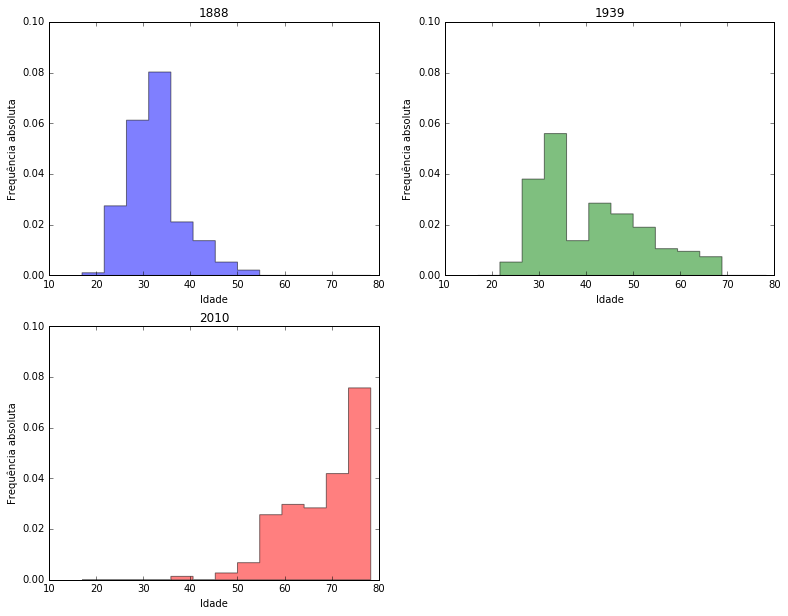

In [9]:
fig = plt.figure(figsize = (13, 10))

plt.subplot(221)
plot = df.a1888.plot.hist(bins = faixa, title = '1888', figsize = (13, 10), alpha = 0.5, color = 'b', normed = 1,
                         histtype='stepfilled')
plt.ylabel('Frequência absoluta')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

plt.subplot(222)
plot = df.a1939.plot.hist(bins = faixa, title = '1939', figsize = (13, 10), alpha = 0.5, color = 'g', normed = 1,
                         histtype='stepfilled')
plt.ylabel('Frequência absoluta')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

plt.subplot(223)
plot = df.a2010.plot.hist(bins = faixa, title = '2010', figsize = (13, 10), alpha = 0.5, color = 'r', normed = 1,
                         histtype='stepfilled')
plt.ylabel('Frequência absoluta')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

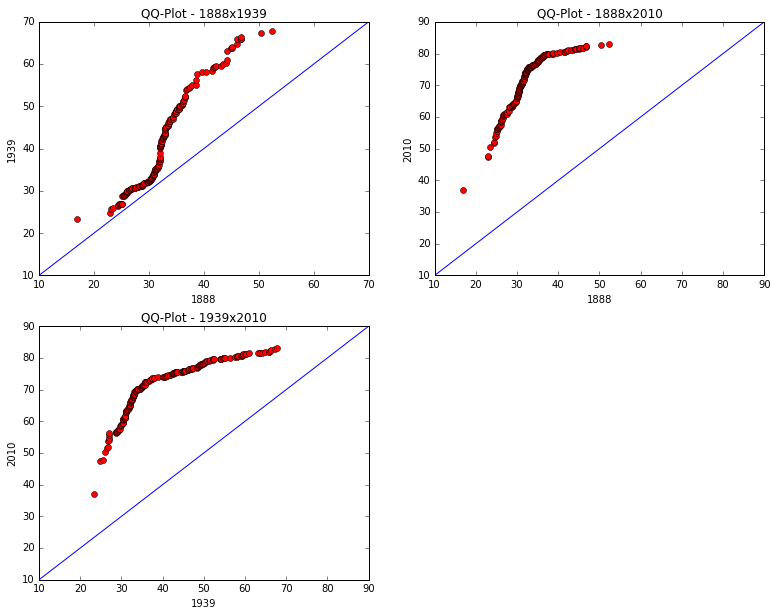

In [10]:
fig = plt.figure(figsize = (13, 10))

plt.subplot(221)
plt.plot(df.a1888, df.a1939, 'ro')
plt.plot((10, 70), (10, 70))
plt.title('QQ-Plot - 1888x1939')
plt.xlabel('1888')
plt.ylabel('1939')

plt.subplot(222)
plt.plot(df.a1888, df.a2010, 'ro')
plt.plot((10, 90), (10, 90))
plt.title('QQ-Plot - 1888x2010')
plt.xlabel('1888')
plt.ylabel('2010')

plt.subplot(223)
plt.plot(df.a1939, df.a2010, 'ro')
plt.plot((10, 90), (10, 90))
plt.title('QQ-Plot - 1939x2010')
plt.xlabel('1939')
plt.ylabel('2010')

### Aderência de um modelo probabilístico normal aos dados

In [12]:
mu1 = df.a1888.mean()
mu2 = df.a1939.mean()
mu3 = df.a2010.mean()

sigma1 = (df.a1888.var())**0.5
sigma2 = (df.a1939.var())**0.5
sigma3 = (df.a2010.var())**0.5

(0, 0.1)

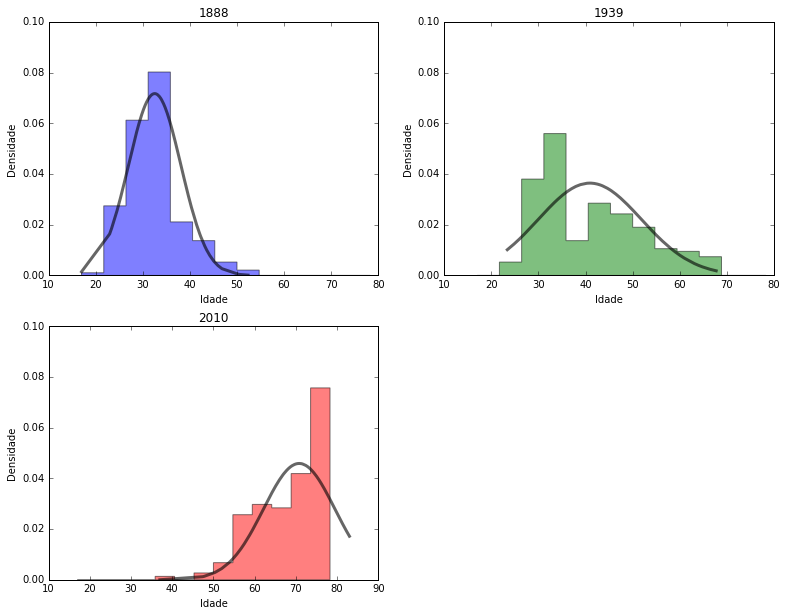

In [13]:
fig = plt.figure(figsize = (13, 10))

plt.subplot(221)
plot = df.a1888.plot.hist(bins = faixa, title = '1888', figsize = (13, 10), alpha = 0.5, color = 'b', normed = 1, 
                          histtype='stepfilled')
plt.plot(df.a1888, stats.norm.pdf(df.a1888, loc = mu1, scale = sigma1), lw = 3, alpha = 0.6, color = 'black')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

plt.subplot(222)
plot = df.a1939.plot.hist(bins = faixa, title = '1939', figsize = (13, 10), alpha = 0.5, color = 'g', normed = 1,
                         histtype='stepfilled')
plt.plot(df.a1939, stats.norm.pdf(df.a1939, loc = mu2, scale = sigma2), lw = 3, alpha = 0.6, color = 'black')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

plt.subplot(223)
plot = df.a2010.plot.hist(bins = faixa, title = '2010', figsize = (13, 10), alpha = 0.5, color = 'r', normed = 1,
                         histtype='stepfilled')
plt.plot(df.a2010, stats.norm.pdf(df.a2010, loc = mu3, scale = sigma3), lw = 3, alpha = 0.6, color = 'black')
plt.ylabel('Densidade')
plt.xlabel('Idade')
plt.ylim(0, 0.1)

In [14]:
fra = []
for i in range (1, 202):
    fra.append ((i - 0.5)/201)

In [15]:
q1888 = [] # quantis teoricos da distribuição normal 1888
for i in fra:
    q1888.append(stats.norm.ppf(i, loc = mu1, scale = sigma1))

q1939 = [] # quantis teoricos da distribuição normal 1939
for i in fra:
    q1939.append(stats.norm.ppf(i, loc = mu2, scale = sigma2))
    
q2010 = [] # quantis teoricos da distribuição normal 2010
for i in fra:
    q2010.append(stats.norm.ppf(i, loc = mu3, scale = sigma3))

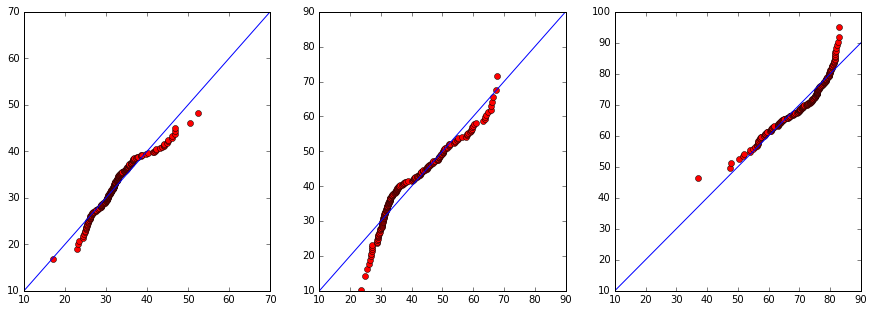

In [16]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
plt.plot(df.a1888, q1888, 'ro')
plt.plot((10, 70), (10, 70))

plt.subplot(132)
plt.plot(df.a1939, q1939, 'ro')
plt.plot((10, 90), (10, 90))

plt.subplot(133)
plt.plot(df.a2010, q2010, 'ro')
plt.plot((10, 90), (10, 90))

In [17]:
pa1888 = [] # Probabilidade Acumulada 1888
for i in df.a1888:
    pa1888.append(stats.norm.cdf(i, loc = mu1, scale = sigma1))
    
pa1939 = [] # # Probabilidade Acumulada 1939
for i in df.a1939:
    pa1939.append(stats.norm.cdf(i, loc = mu2, scale = sigma2))
    
pa2010 = [] # # Probabilidade Acumulada 2010
for i in df.a2010:
    pa2010.append(stats.norm.cdf(i, loc = mu3, scale = sigma3))

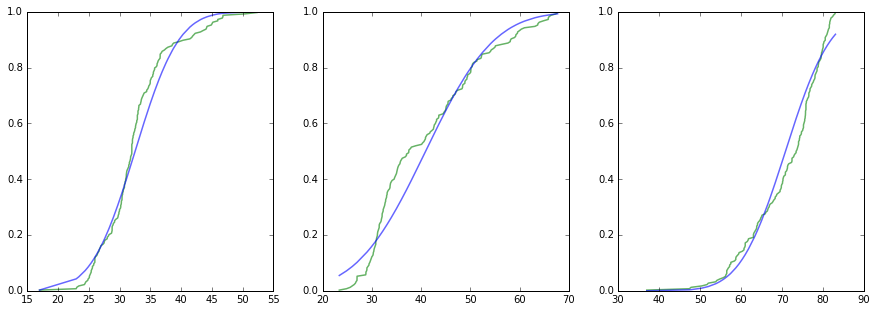

In [18]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
plt.plot(df.a1888, fra, lw = 1.5, color = 'g', alpha = 0.6)
plt.plot(df.a1888, pa1888, lw = 1.5, color = 'b', alpha = 0.6)

plt.subplot(132)
plt.plot(df.a1939, fra, lw = 1.5, color = 'g', alpha = 0.6)
plt.plot(df.a1939, pa1939, lw = 1.5, color = 'b', alpha = 0.6)

plt.subplot(133)
plt.plot(df.a2010, fra, lw = 1.5, color = 'g', alpha = 0.6)
plt.plot(df.a2010, pa2010, lw = 1.5, color = 'b', alpha = 0.6)

___
### Aderência de um modelo probabilístico assimétrico aos dados

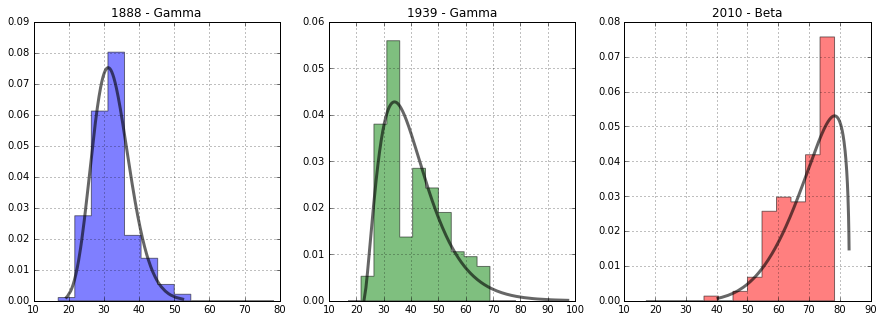

In [19]:
plt.figure(figsize = (15, 5))

a1, l1, s1 = stats.gamma.fit(df.a1888)
a2, l2, s2 = stats.gamma.fit(df.a1939)
a3, b, l3, s3 = stats.beta.fit(df.a2010)

plt.subplot(131)
x = sorted(stats.gamma.rvs(a1, size = 1000, loc = l1, scale = s1))
plt.plot(x, stats.gamma.pdf(x, a = a1, loc = l1, scale = s1), lw = 3, alpha = 0.6, color = 'Black')
df.a1888.hist(bins = faixa, color = "b", alpha = 0.5, normed = 1, histtype='stepfilled')
plt.title('1888 - Gamma')

plt.subplot(132)
x = sorted(stats.gamma.rvs(a2, size = 1000, loc = l2, scale = s2))
plt.plot(x, stats.gamma.pdf(x, a = a2, loc = l2, scale = s2), lw = 3, alpha = 0.6, color = 'Black')
df.a1939.hist(bins = faixa, color = "g", alpha = 0.5, normed = 1, histtype='stepfilled')
plt.title('1939 - Gamma')

plt.subplot(133)
x = sorted(stats.beta.rvs(a3, b, size = 1000, loc = l3, scale = s3)) # scale = 54 (para ambos acabarem próximos)
plt.plot(x, stats.beta.pdf(x, a = a3, b = b, loc = l3, scale = s3), lw = 3, alpha = 0.6, color = 'Black')
df.a2010.hist(bins = faixa, color = "r", alpha = 0.5, normed = 1, histtype='stepfilled')
plt.title('2010 - Beta')

In [20]:
q1888 = [] # quantis teoricos da distribuição normal 1888
for i in fra:
    q1888.append(stats.gamma.ppf(i, a = a1, loc = l1, scale = s1))

q1939 = [] # quantis teoricos da distribuição normal 1939
for i in fra:
    q1939.append(stats.gamma.ppf(i, a = a2, loc = l2, scale = s2))
    
q2010 = [] # quantis teoricos da distribuição normal 2010
for i in fra:
    q2010.append(stats.beta.ppf(i, a = a3, b = b, loc = l3, scale = s3))

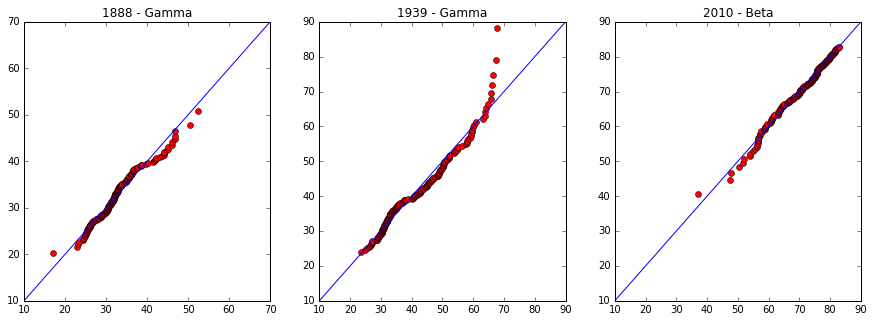

In [21]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
plt.plot(df.a1888, q1888, 'ro')
plt.plot((10, 70), (10, 70))
plt.title('1888 - Gamma')

plt.subplot(132)
plt.plot(df.a1939, q1939, 'ro')
plt.plot((10, 90), (10, 90))
plt.title('1939 - Gamma')

plt.subplot(133)
plt.plot(df.a2010, q2010, 'ro')
plt.plot((10, 90), (10, 90))
plt.title('2010 - Beta')

In [22]:
pa1888 = [] # Probabilidade Acumulada 1888
for i in df.a1888:
    pa1888.append(stats.gamma.cdf(i, a = a1, loc = l1, scale = s1))
    
pa1939 = [] # # Probabilidade Acumulada 1939
for i in df.a1939:
    pa1939.append(stats.gamma.cdf(i, a = a2, loc = l2, scale = s2))
    
pa2010 = [] # # Probabilidade Acumulada 2010
for i in df.a2010:
    pa2010.append(stats.beta.cdf(i, a = a3, b = b, loc = l3, scale = s3))

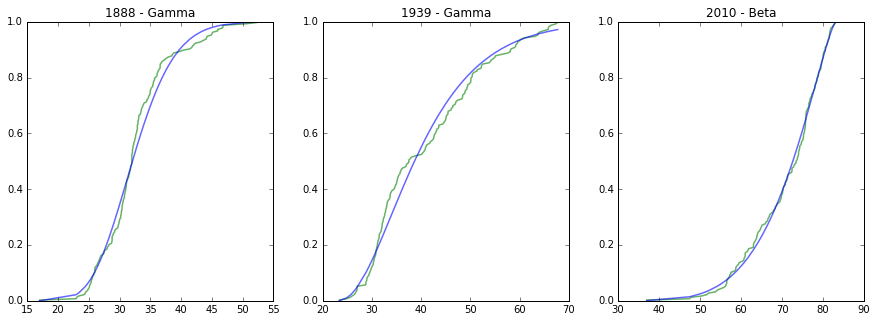

In [23]:
plt.figure(figsize = (15, 5))

plt.subplot(131)
plt.plot(df.a1888, fra, lw = 1.5, color = 'g', alpha = 0.6)
plt.plot(df.a1888, pa1888, lw = 1.5, color = 'b', alpha = 0.6)
plt.title('1888 - Gamma')

plt.subplot(132)
plt.plot(df.a1939, fra, lw = 1.5, color = 'g', alpha = 0.6)
plt.plot(df.a1939, pa1939, lw = 1.5, color = 'b', alpha = 0.6)
plt.title('1939 - Gamma')

plt.subplot(133)
plt.plot(df.a2010, fra, lw = 1.5, color = 'g', alpha = 0.6)
plt.plot(df.a2010, pa2010, lw = 1.5, color = 'b', alpha = 0.6)
plt.title('2010 - Beta')

___
### Cálculo de probabilidades a partir da distribuição normal

In [24]:
print('Probabilidade de um país ter expectativa de vida superior a 70 anos em 1888 é:', 
      1 - (stats.norm.cdf(80, loc = mu1, scale = sigma1)), '\n')

print('Probabilidade de um país ter expectativa de vida superior a 70 anos em 1939 é:', 
      1 - (stats.norm.cdf(80, loc = mu2, scale = sigma2)), '\n')

print('Probabilidade de um país ter expectativa de vida superior a 70 anos em 2010 é:', 
      1 - (stats.norm.cdf(80, loc = mu3, scale = sigma3)))

Probabilidade de um país ter expectativa de vida superior a 70 anos em 1888 é: 0.0 

Probabilidade de um país ter expectativa de vida superior a 70 anos em 1939 é: 0.00018073185225 

Probabilidade de um país ter expectativa de vida superior a 70 anos em 2010 é: 0.145278220079


In [25]:
# P(x<75|x>70) = P(70<x<75)/P(x>70)

A1 = stats.norm.cdf(75, loc = mu1, scale = sigma1)
A2 = stats.norm.cdf(70, loc = mu1, scale = sigma1)

B1 = stats.norm.cdf(75, loc = mu2, scale = sigma2)
B2 = stats.norm.cdf(70, loc = mu2, scale = sigma2)

C1 = stats.norm.cdf(75, loc = mu3, scale = sigma3)
C2 = stats.norm.cdf(70, loc = mu3, scale = sigma3)

print('Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 1888:', 
      ((A1 - A2)/(1 - A2)), '\n')

print('Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 1939:', 
      ((B1 - B2)/(1 - B2)), '\n')

print('Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 2010:', 
      ((C1 - C2)/(1 - C2)))

Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 1888: 0.998608490882 

Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 1939: 0.765021555151 

Probabilidade de um país ter expectativa de vida inferior a 75 anos, dado que seja superior a 70 anos em 2010: 0.413597774474


In [26]:
A4 = stats.norm.ppf(0.1, loc = mu1, scale = sigma1)
B4 = stats.norm.ppf(0.1, loc = mu2, scale = sigma2)
C4 = stats.norm.ppf(0.1, loc = mu3, scale = sigma3)

print('A maior expectativa de vida dos 10% de países com menores expectativas de vida em 1888 é:', A4, 'anos\n')
print('A maior expectativa de vida dos 10% de países com menores expectativas de vida em 1939 é:', B4, 'anos\n')
print('A maior expectativa de vida dos 10% de países com menores expectativas de vida em 2010 é:', C4, 'anos')

A maior expectativa de vida dos 10% de países com menores expectativas de vida em 1888 é: 25.3980774689 anos

A maior expectativa de vida dos 10% de países com menores expectativas de vida em 1939 é: 26.8681647111 anos

A maior expectativa de vida dos 10% de países com menores expectativas de vida em 2010 é: 59.6620175175 anos


In [27]:
A5 = stats.norm.ppf(0.9, loc = mu1, scale = sigma1)
B5 = stats.norm.ppf(0.9, loc = mu2, scale = sigma2)
C5 = stats.norm.ppf(0.9, loc = mu3, scale = sigma3)

print('A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 1888 é:', A5, 'anos\n')
print('A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 1939 é:', B5, 'anos\n')
print('A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 2010 é:', C5, 'anos')

A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 1888 é: 39.6616660519 anos

A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 1939 é: 54.9569574879 anos

A menor expectativa de vida dos 10% de países com maiores expectativas de vida em 2010 é: 81.9538232785 anos
